In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../../data/result/result4.csv', delimiter = ';')
print(df.head())

   day  timestamp           product  bid_price_1  bid_volume_1  bid_price_2  \
0   -1          0  RAINFOREST_RESIN        10002             1       9996.0   
1   -1          0              KELP         2028             1       2026.0   
2   -1        100              KELP         2025            24          NaN   
3   -1        100  RAINFOREST_RESIN         9996             2       9995.0   
4   -1        200  RAINFOREST_RESIN         9995            20          NaN   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           2.0       9995.0          29.0        10004             2   
1           2.0       2025.0          29.0         2029            31   
2           NaN          NaN           NaN         2028             2   
3          22.0          NaN           NaN        10004             2   
4           NaN          NaN           NaN        10005            20   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0      10005.0  

In [4]:
unique_products = df['product'].unique()
print(unique_products)

['RAINFOREST_RESIN' 'KELP']


In [5]:
df_rf = df[df['product'] == 'RAINFOREST_RESIN'].copy()
df_kelp = df[df['product'] == 'KELP'].copy()

print(df_rf['mid_price'].isnull().sum())
print(df_kelp['mid_price'].isnull().sum())



0
0


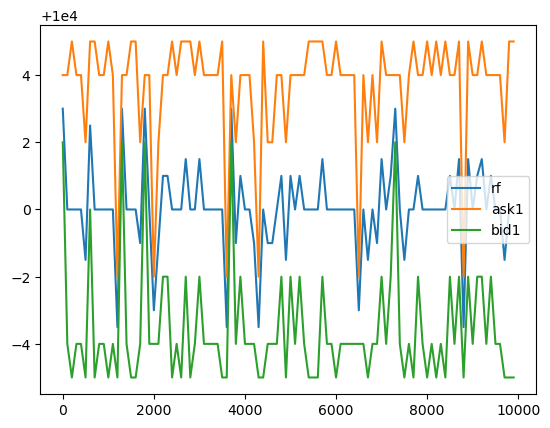

In [8]:
import matplotlib.pyplot as plt
plt.plot(df_rf['timestamp'][:100], df_rf['mid_price'][:100], label = 'rf')
plt.plot(df_rf['timestamp'][:100], df_rf['ask_price_1'][:100], label = 'ask1')
plt.plot(df_rf['timestamp'][:100], df_rf['bid_price_1'][:100], label = 'bid1')
plt.legend()
plt.show()

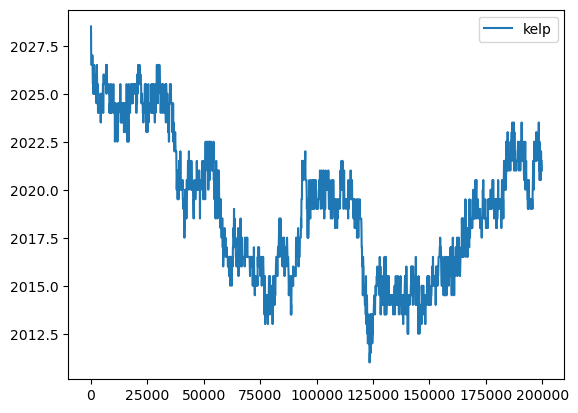

In [55]:
plt.plot(df_kelp['timestamp'], df_kelp['mid_price'], label = 'kelp')
plt.legend()
plt.show()

In [71]:
# 计算best_bid和best_ask
def get_best_bid_ask(row):
    # 获取有效的买价（去掉NaN）
    bid_prices = [row['bid_price_1'], row['bid_price_2'], row['bid_price_3']]
    bid_prices = [price for price in bid_prices if pd.notna(price)]
    best_bid = max(bid_prices) if bid_prices else None

    # 获取有效的卖价（去掉NaN）
    ask_prices = [row['ask_price_1'], row['ask_price_2'], row['ask_price_3']]
    ask_prices = [price for price in ask_prices if pd.notna(price)]
    best_ask = min(ask_prices) if ask_prices else None
    
    # 计算价差
    price_gap = best_ask - best_bid
    return best_bid, best_ask, price_gap

df_rf[['best_bid', 'best_ask', 'price_gap']] = df_rf.apply(get_best_bid_ask, axis=1, result_type='expand')
print(df_rf.head())
df_kelp[['best_bid', 'best_ask', 'price_gap']] = df_kelp.apply(get_best_bid_ask, axis=1, result_type='expand')
print(df_kelp.head())


   day  timestamp           product  bid_price_1  bid_volume_1  bid_price_2  \
0   -1          0  RAINFOREST_RESIN        10002             1       9996.0   
3   -1        100  RAINFOREST_RESIN         9996             2       9995.0   
4   -1        200  RAINFOREST_RESIN         9995            20          NaN   
7   -1        300  RAINFOREST_RESIN         9996             2       9995.0   
8   -1        400  RAINFOREST_RESIN         9996             2       9995.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           2.0       9995.0          29.0        10004             2   
3          22.0          NaN           NaN        10004             2   
4           NaN          NaN           NaN        10005            20   
7          29.0          NaN           NaN        10004             2   
8          25.0          NaN           NaN        10004             2   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0      10005.0  

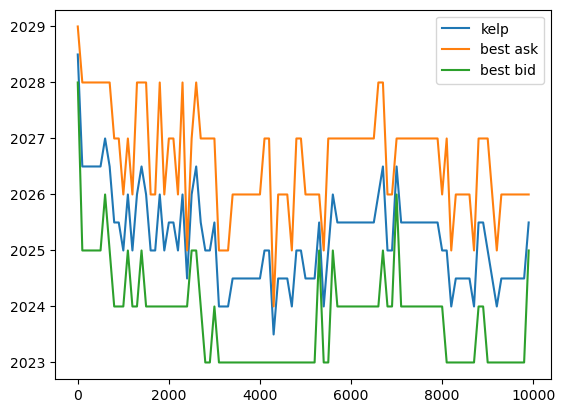

In [72]:
plt.plot(df_kelp['timestamp'][:100], df_kelp['mid_price'][:100], label = 'kelp')
plt.plot(df_kelp['timestamp'][:100], df_kelp['best_ask'][:100], label = 'best ask')
plt.plot(df_kelp['timestamp'][:100], df_kelp['best_bid'][:100], label = 'best bid')
plt.legend()
plt.show()

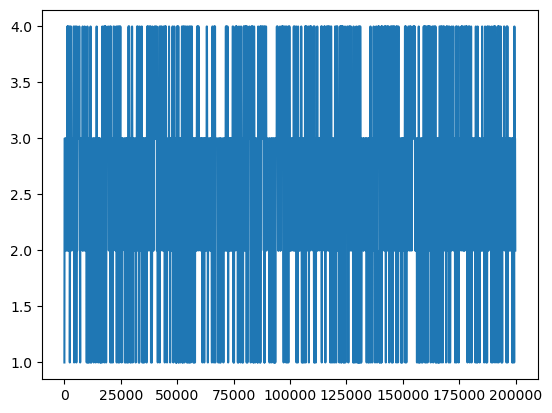

price_gap
3    1077
2     371
4     323
1     229
Name: count, dtype: int64


In [73]:
plt.plot(df_kelp['timestamp'], df_kelp['price_gap'])
plt.show()
print(df_kelp['price_gap'].value_counts())

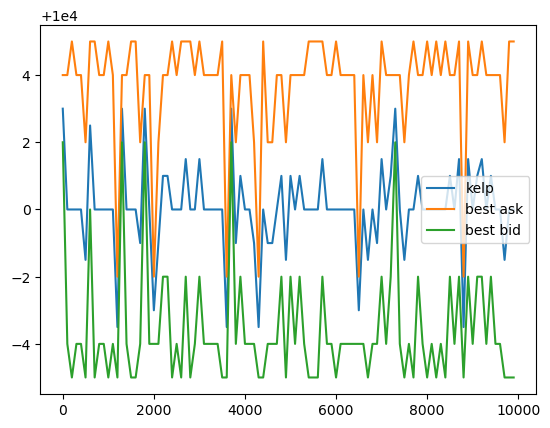

In [74]:
plt.plot(df_rf['timestamp'][:100], df_rf['mid_price'][:100], label = 'kelp')
plt.plot(df_rf['timestamp'][:100], df_rf['best_ask'][:100], label = 'best ask')
plt.plot(df_rf['timestamp'][:100], df_rf['best_bid'][:100], label = 'best bid')
plt.legend()
plt.show()

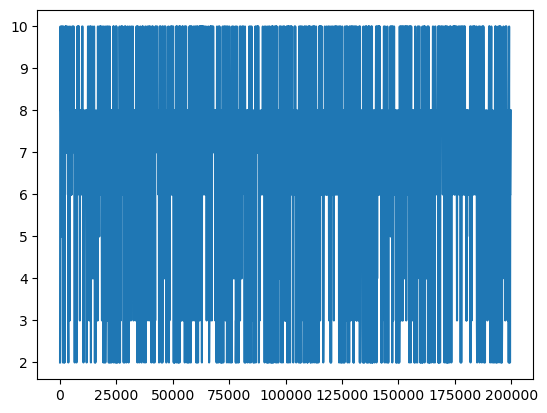

price_gap
8     683
10    376
6     345
2     233
7     196
3     113
4      34
5      20
Name: count, dtype: int64


In [75]:
plt.plot(df_rf['timestamp'], df_rf['price_gap'])
plt.show()
print(df_rf['price_gap'].value_counts())